In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.initializers import glorot_uniform
from tensorflow.keras import regularizers

import keras.backend as K
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.externals.joblib import load
from keras.models import load_model
import seaborn as sb
import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

# comment the below line if you not using jupyter notebook
%matplotlib inline

In [2]:
print("Started reading the data for training...")
df_ = pd.read_csv('train.csv')
df = df_.copy()
# df_training = df.iloc[:,:].copy()
print("Finished reading the data")

Started reading the data for training...
Finished reading the data


In [3]:
df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['color_type'])
df['color_type'] = le.transform(df['color_type'])

In [5]:
df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,18,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,53,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,15,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,53,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,2,0.50,11.06,18,4,0.0,1


In [6]:
from sklearn.preprocessing import OneHotEncoder
enc_y1 = OneHotEncoder(handle_unknown='ignore')
enc_y1.fit(df[['breed_category']])
y1 = enc_y1.transform(df[['breed_category']]).toarray()
enc_y2 = OneHotEncoder(handle_unknown='ignore')
enc_y2.fit(df[['pet_category']])
y2 = enc_y2.transform(df[['pet_category']]).toarray()

In [12]:
y = np.append(y1,y2,axis=1)

In [13]:
df[['condition']] = df[['condition']].fillna(3.0)

In [14]:
df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,18,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,53,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,3.0,15,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,53,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,2,0.50,11.06,18,4,0.0,1


In [15]:
x = df[['condition', 'color_type', 'length(m)', 'height(cm)', 'X1', 'X2']].values

In [16]:
def scaleData(x, y):
    sc_x = StandardScaler()
    sc_y = StandardScaler()

    sc_x.fit(x)
    sc_y.fit(y)
    
    return sc_x, sc_y

In [17]:
sc_x, sc_y = scaleData(x,y)

In [18]:
x_scaled = sc_x.transform(x)

In [19]:
x_train = x_scaled[:15000,:]
y_train = y[:15000,:]
x_val = x_scaled[15000:,:]
y_val = y[15000:,:]

In [45]:
model = Sequential()
Kreg = regularizers.l2(1e-4)

model.add(Dense(64, activation = 'relu', input_shape = (x_train.shape[1],),
                kernel_initializer = glorot_uniform(seed = 1), kernel_regularizer = Kreg))

model.add(Dense(64, activation = 'relu',
                kernel_initializer = glorot_uniform(seed = 2), kernel_regularizer = Kreg))

model.add(Dense(64, activation = 'relu',
                kernel_initializer = glorot_uniform(seed = 3), kernel_regularizer = Kreg))

model.add(Dense(7, activation = 'sigmoid',
                kernel_initializer = glorot_uniform(seed = 4), kernel_regularizer = Kreg))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 455       
Total params: 9,223
Trainable params: 9,223
Non-trainable params: 0
_________________________________________________________________


In [47]:
adam = Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics = ['categorical_accuracy'])

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('model_cond-4-64.h5', monitor='loss', mode='min', save_best_only=True, verbose=1)
callbacks = [es, mc]

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data = (x_val,y_val),
                    verbose = 1, callbacks = callbacks)

Epoch 1/100
454/469 [============================>.] - ETA: 0s - loss: 2.4949 - categorical_accuracy: 0.5432
Epoch 00001: loss improved from inf to 2.48574, saving model to model_cond-4-64.h5
469/469 [==============================] - 1s 3ms/step - loss: 2.4857 - categorical_accuracy: 0.5503 - val_loss: 2.2248 - val_categorical_accuracy: 0.7100
Epoch 2/100
457/469 [============================>.] - ETA: 0s - loss: 2.1821 - categorical_accuracy: 0.7463
Epoch 00002: loss improved from 2.48574 to 2.18161, saving model to model_cond-4-64.h5
469/469 [==============================] - 1s 3ms/step - loss: 2.1816 - categorical_accuracy: 0.7473 - val_loss: 2.1902 - val_categorical_accuracy: 0.7728
Epoch 3/100
449/469 [===========================>..] - ETA: 0s - loss: 2.1640 - categorical_accuracy: 0.7706
Epoch 00003: loss improved from 2.18161 to 2.16160, saving model to model_cond-4-64.h5
469/469 [==============================] - 1s 2ms/step - loss: 2.1616 - categorical_accuracy: 0.7691 - val

Epoch 25/100
453/469 [===========================>..] - ETA: 0s - loss: 2.0980 - categorical_accuracy: 0.7329
Epoch 00025: loss improved from 2.10009 to 2.09563, saving model to model_cond-4-64.h5
469/469 [==============================] - 1s 3ms/step - loss: 2.0956 - categorical_accuracy: 0.7342 - val_loss: 2.1423 - val_categorical_accuracy: 0.7306
Epoch 26/100
443/469 [===========================>..] - ETA: 0s - loss: 2.0934 - categorical_accuracy: 0.7384
Epoch 00026: loss improved from 2.09563 to 2.09358, saving model to model_cond-4-64.h5
469/469 [==============================] - 1s 2ms/step - loss: 2.0936 - categorical_accuracy: 0.7376 - val_loss: 2.1415 - val_categorical_accuracy: 0.7217
Epoch 27/100
447/469 [===========================>..] - ETA: 0s - loss: 2.0938 - categorical_accuracy: 0.7397
Epoch 00027: loss improved from 2.09358 to 2.09216, saving model to model_cond-4-64.h5
469/469 [==============================] - 1s 3ms/step - loss: 2.0922 - categorical_accuracy: 0.740

Epoch 49/100
453/469 [===========================>..] - ETA: 0s - loss: 2.0637 - categorical_accuracy: 0.7052
Epoch 00049: loss improved from 2.06330 to 2.06272, saving model to model_cond-4-64.h5
469/469 [==============================] - 1s 3ms/step - loss: 2.0627 - categorical_accuracy: 0.7048 - val_loss: 2.1217 - val_categorical_accuracy: 0.6588
Epoch 50/100
441/469 [===========================>..] - ETA: 0s - loss: 2.0602 - categorical_accuracy: 0.7025
Epoch 00050: loss improved from 2.06272 to 2.06035, saving model to model_cond-4-64.h5
469/469 [==============================] - 1s 2ms/step - loss: 2.0604 - categorical_accuracy: 0.7037 - val_loss: 2.1114 - val_categorical_accuracy: 0.7063
Epoch 51/100
469/469 [==============================] - ETA: 0s - loss: 2.0588 - categorical_accuracy: 0.6975
Epoch 00051: loss improved from 2.06035 to 2.05883, saving model to model_cond-4-64.h5
469/469 [==============================] - 1s 2ms/step - loss: 2.0588 - categorical_accuracy: 0.697

Epoch 73/100
460/469 [============================>.] - ETA: 0s - loss: 2.0210 - categorical_accuracy: 0.6537
Epoch 00073: loss improved from 2.02332 to 2.01993, saving model to model_cond-4-64.h5
469/469 [==============================] - 1s 2ms/step - loss: 2.0199 - categorical_accuracy: 0.6530 - val_loss: 2.0733 - val_categorical_accuracy: 0.6526
Epoch 74/100
454/469 [============================>.] - ETA: 0s - loss: 2.0181 - categorical_accuracy: 0.6487
Epoch 00074: loss improved from 2.01993 to 2.01827, saving model to model_cond-4-64.h5
469/469 [==============================] - 1s 3ms/step - loss: 2.0183 - categorical_accuracy: 0.6497 - val_loss: 2.0825 - val_categorical_accuracy: 0.6171
Epoch 75/100
461/469 [============================>.] - ETA: 0s - loss: 2.0166 - categorical_accuracy: 0.6408
Epoch 00075: loss improved from 2.01827 to 2.01589, saving model to model_cond-4-64.h5
469/469 [==============================] - 1s 2ms/step - loss: 2.0159 - categorical_accuracy: 0.642

Epoch 97/100
465/469 [============================>.] - ETA: 0s - loss: 1.9778 - categorical_accuracy: 0.6011
Epoch 00097: loss did not improve from 1.97769
469/469 [==============================] - 1s 3ms/step - loss: 1.9782 - categorical_accuracy: 0.6008 - val_loss: 2.0778 - val_categorical_accuracy: 0.5832
Epoch 98/100
454/469 [============================>.] - ETA: 0s - loss: 1.9763 - categorical_accuracy: 0.5988
Epoch 00098: loss improved from 1.97769 to 1.97660, saving model to model_cond-4-64.h5
469/469 [==============================] - 2s 5ms/step - loss: 1.9766 - categorical_accuracy: 0.5991 - val_loss: 2.0346 - val_categorical_accuracy: 0.6255
Epoch 99/100
465/469 [============================>.] - ETA: 0s - loss: 1.9721 - categorical_accuracy: 0.6011
Epoch 00099: loss improved from 1.97660 to 1.97175, saving model to model_cond-4-64.h5
469/469 [==============================] - 2s 4ms/step - loss: 1.9718 - categorical_accuracy: 0.6011 - val_loss: 2.0444 - val_categorical_a

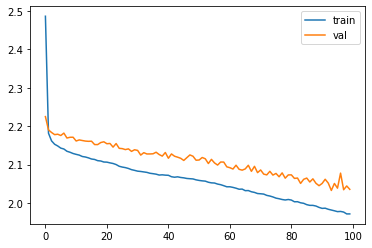

In [48]:
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

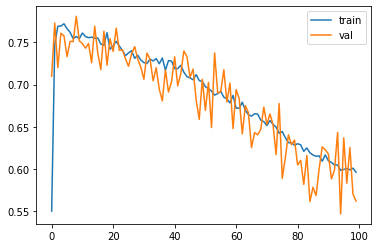

In [49]:
plt.figure()
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='val')
plt.legend()
plt.show()

In [50]:
ymodel = model.predict(x_val)

In [51]:
ymodel1 = enc_y1.inverse_transform(ymodel[:,:3])
y_act1 = enc_y1.inverse_transform(y_val[:,:3])
ymodel2 = enc_y2.inverse_transform(ymodel[:,3:])
y_act2 = enc_y2.inverse_transform(y_val[:,3:])

In [52]:
from sklearn.metrics import f1_score

In [53]:
f1 = f1_score(ymodel1[:,0],y_act1[:,0],average='weighted')

In [54]:
f2 = f1_score(ymodel2[:,0],y_act2[:,0],average='weighted')

In [55]:
(f1+f2)*100/2

85.39076561104508

In [56]:
86.0433

86.0433